# Импорт библиотек

In [1]:
from random import uniform
from random import random
import numpy as np
from numba import njit
import matplotlib.pyplot as plt
import time

plt.rcParams['figure.figsize'] = 8, 8  # Стандартные размеры графиков
plt.rcParams['axes.grid'] = True  # Сетка графика
plt.pink()  # Цветовая схема при раскраске

<Figure size 800x800 with 0 Axes>

# Тестовые функции для оптимизации

In [2]:
@njit
def rastrigin(x: np.ndarray):  # функция Растригина от -5.12 до 5.12
    a = 10
    result = 0
    n = x.size
    for i in range(n):
        result += x[i] ** 2 - a * np.cos(2 * np.pi * x[i])

    return a * n + result


@njit
def sphere(x: np.ndarray):  # функция Сферы
    result = 0
    n = x.size
    for i in range(n):
        result += x[i] ** 2
    return result


@njit
def rozenbroke(x: np.ndarray):  # Функция Розенброка, минимум в точке f(1;1) = 0
    result = 0
    n = x.size
    for i in range(n - 1):
        result += (100 * x[i + 1] - x[i] ** 2) ** 2 + (x[i] - 1) ** 2
    return result

# Реализация метода роя частиц на Python с использованием numba

In [3]:
@njit
def main(v_max: float, dimension: int, f, kol_agents=50, kol_iter=400):
    px_list: np.ndarray
    py_list: np.ndarray
    best_solution: np.ndarray
    best_coord: np.ndarray

    # dimension = 2  # размерность
    r1 = np.random.rand(dimension - 1)
    r2 = np.random.rand(dimension - 1)
    weight = 3.4
    p_global_best = 1000.0
    p_best_coordinates = np.zeros(dimension - 1)

    for j in range(kol_agents):
        coordinates = np.random.uniform(-5.12, 5.12, dimension - 1)
        c1 = random()
        c2 = random()
        p_coordinates_now = np.copy(coordinates)
        p_coordinates = np.copy(coordinates)
        p = f(coordinates)
        array_of_speed = np.zeros((kol_iter, dimension - 1))

        if p_global_best > p:
            p_best_coordinates = p_coordinates
            p_global_best = p

        for k in range(dimension - 1):
            array_of_speed[0][k] = uniform(-1 * v_max, v_max)

        for i in range(1, len(array_of_speed)):
            array_of_speed[i] = array_of_speed[i - 1] * weight + \
                                c1 * r1 * (p_best_coordinates - p_coordinates_now) + \
                                c2 * r2 * (p_best_coordinates - p_coordinates_now)

            for k in range(dimension - 1):
                if array_of_speed[i][k] > 0:
                    array_of_speed[i][k] = min(array_of_speed[i][k], v_max)
                else:
                    array_of_speed[i][k] = max(array_of_speed[i][k], v_max)

            p_coordinates_now = p_coordinates_now + array_of_speed[i]

            if p > f(p_coordinates_now):
                p = f(p_coordinates_now)
                p_coordinates = p_coordinates_now

        if j == 0:
            px_list = np.copy(coordinates)
            py_list = np.array([p])
        else:
            px_list = np.append(px_list, coordinates)
            py_list = np.append(py_list, p)

        if p_global_best > p:
            p_best_coordinates = p_coordinates
            p_global_best = p

        if j == 0:
            best_solution = np.array([p_global_best])
            best_coord = np.copy(p_best_coordinates)
        else:
            best_solution = np.append(best_solution, p_global_best)
            best_coord = np.append(best_coord, p_best_coordinates)
    print("global_best:", p_global_best, "coordinates:", p_best_coordinates)
    # print("Размерности совпадают: ", px_list.shape == py_list.shape)
    return [px_list, py_list], [best_coord, best_solution]

In [21]:
list_of_all = main(0.04, 3, rastrigin)
list_of_x = list_of_all[0][0]
list_of_y = list_of_all[0][1]
list_of_best_coord = list_of_all[1][0]
list_of_best_solution = list_of_all[1][1]

global_best: 0.0314637511651199 coordinates: [-0.01100231 -0.00613152]


[ 1.14409422 -1.17857567  1.14409422 -1.17857567  1.08082801  1.06580606
  1.08082801  1.06580606  1.08082801  1.06580606  0.92205396 -0.91146533
  0.92205396 -0.91146533  0.92205396 -0.91146533  0.92205396 -0.91146533
  0.92205396 -0.91146533  0.92205396 -0.91146533  0.92205396 -0.91146533
  0.92205396 -0.91146533  0.92205396 -0.91146533  0.92205396 -0.91146533
  0.92205396 -0.91146533  0.92205396 -0.91146533  0.92205396 -0.91146533
  0.92205396 -0.91146533  0.92205396 -0.91146533  0.92205396 -0.91146533
  0.92205396 -0.91146533  0.92205396 -0.91146533  0.92205396 -0.91146533
  0.92205396 -0.91146533  0.92205396 -0.91146533 -0.9153739  -0.06731104
 -0.9153739  -0.06731104 -0.9153739  -0.06731104 -0.9153739  -0.06731104
  0.00713185 -0.02394664  0.00713185 -0.02394664  0.00713185 -0.02394664
  0.00713185 -0.02394664  0.00713185 -0.02394664 -0.01100231 -0.00613152
 -0.01100231 -0.00613152 -0.01100231 -0.00613152 -0.01100231 -0.00613152
 -0.01100231 -0.00613152 -0.01100231 -0.00613152 -0

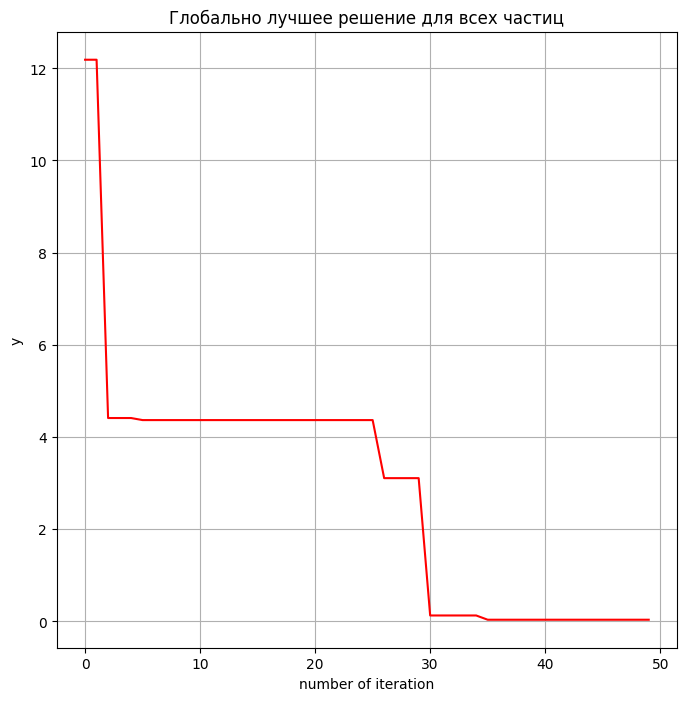

In [22]:
print(list_of_best_coord, "\n", list_of_best_solution)

plt.plot(np.arange(list_of_best_solution.size), list_of_best_solution, c='r')
plt.xlabel("number of iteration")
plt.ylabel("y")
plt.title("Глобально лучшее решение для всех частиц")
plt.show()

# Тестирование функций для оптимизации

global_best: 0.07024681895502738 coordinates: [-0.00329404  0.0185369 ]
global_best: 0.06546208442094681 coordinates: [-0.01791901 -0.00303475]
global_best: 0.021566657247582555 coordinates: [-0.00657459  0.00809334]
global_best: 0.2560557281827087 coordinates: [0.00258782 0.03590809]
global_best: 0.9318955381214451 coordinates: [ 0.04089371 -0.05535974]
global_best: 0.13273105849495437 coordinates: [ 0.00158513 -0.02584532]
global_best: 0.17642353783852371 coordinates: [0.02759187 0.01139763]
global_best: 0.08753785817198434 coordinates: [ 0.0135966  -0.01602175]
global_best: 0.004202082136842478 coordinates: [0.00391322 0.00242245]
global_best: 0.08220336823086427 coordinates: [-0.01995471 -0.00408376]


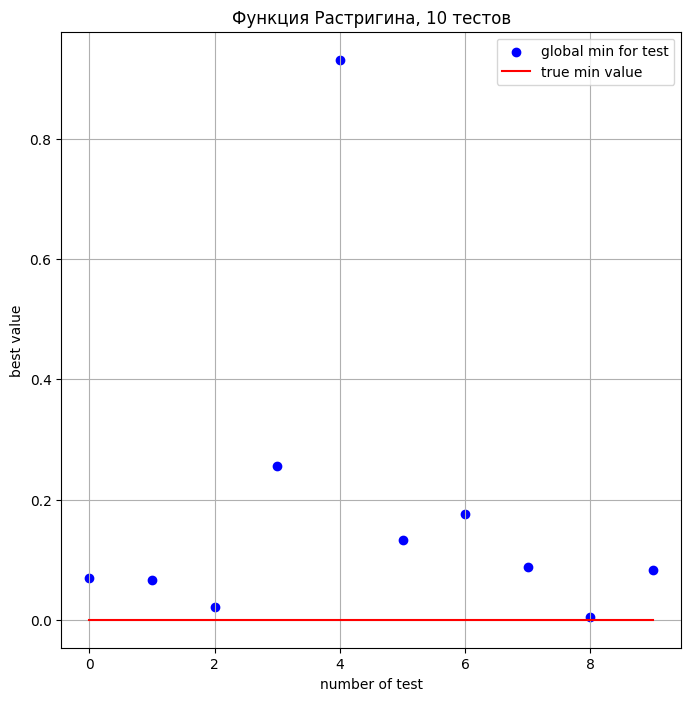

In [24]:
def draw(f, title: str):
    for i in range(10):
        list_of_best_x, list_of_best_y = main(0.05, 3, f, 500, 1000)[1]

        y = list_of_best_y[len(list_of_best_y) - 1]

        if i == 0:
            plt.scatter(i, y, c='b', label='global min for test')
            plt.plot(np.arange(10), np.zeros(10), c='r', label='true min value')
            plt.legend()
            plt.xlabel("number of test")
            plt.ylabel("best value")
        else:
            plt.scatter(i, y, c='b')

    plt.title(title)
    plt.show()


draw(rastrigin, "Функция Растригина, 10 тестов")

global_best: 0.12515910332624874 coordinates: [-0.04636314  0.35072719]
global_best: 0.36414754478938427 coordinates: [0.150519  0.5843728]
global_best: 0.006091403966770856 coordinates: [0.07785524 0.0054741 ]
global_best: 0.27162030916226765 coordinates: [0.18489645 0.4872716 ]
global_best: 0.054843480771055234 coordinates: [ 0.11796196 -0.20230783]
global_best: 0.053136208725862465 coordinates: [-0.16039513 -0.16555848]
global_best: 0.04867006888148098 coordinates: [-0.06391243  0.21115224]
global_best: 0.2505427169754901 coordinates: [-0.43720732 -0.24370571]
global_best: 0.1565617013491405 coordinates: [0.13111625 0.37332322]
global_best: 0.16473906903919022 coordinates: [ 0.25034077 -0.31948172]


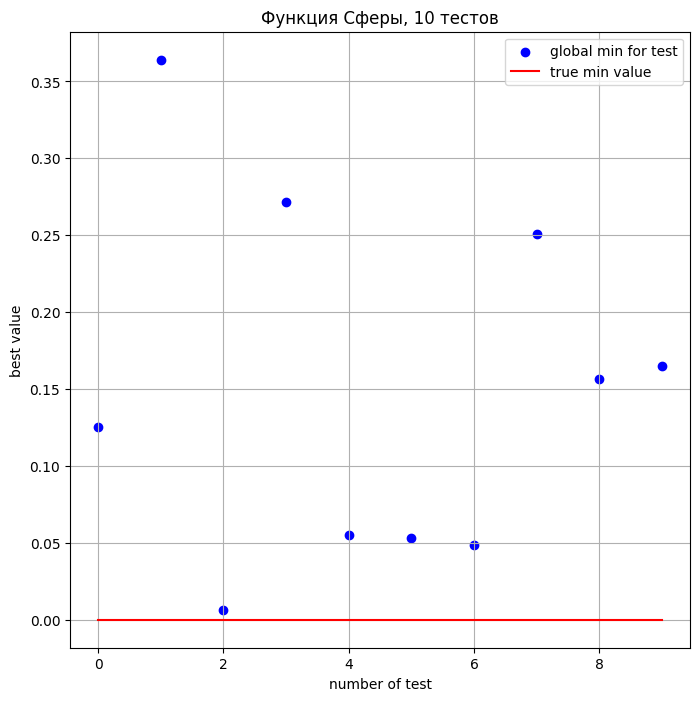

In [62]:
draw(sphere, "Функция Сферы, 10 тестов")

global_best: 0.05714183266266058 coordinates: [1.07295592 0.01378873]
global_best: 0.15467872565327023 coordinates: [1.20372596 0.0178537 ]
global_best: 0.0800959524075935 coordinates: [1.28210706 0.01666416]
global_best: 0.11709249504685734 coordinates: [1.3271771  0.01661161]
global_best: 0.0094044519286559 coordinates: [0.90318761 0.00810108]
global_best: 0.04806505115247434 coordinates: [0.79373735 0.00704321]
global_best: 0.10423774213376887 coordinates: [1.31137006 0.01805052]
global_best: 0.20639721557520904 coordinates: [1.07649081 0.01606657]
global_best: 0.006780034975432075 coordinates: [0.93979256 0.0082704 ]
global_best: 0.08367151562525162 coordinates: [0.75212631 0.00416596]


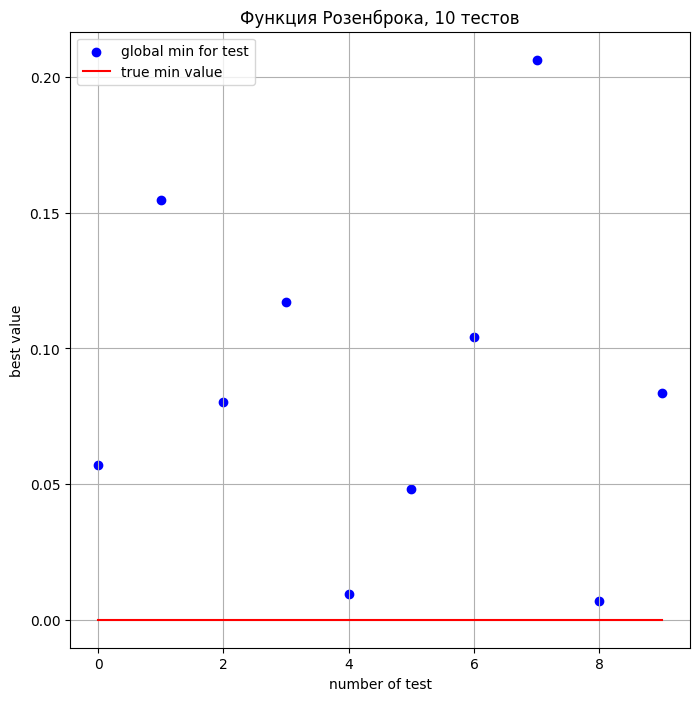

In [25]:
draw(rozenbroke, "Функция Розенброка, 10 тестов")

# Реализация метода роя частиц на C. Сравнение двух реализаций

In [26]:
import ctypes
import os


class Result(ctypes.Structure):
    _fields_ = [
        ("best_solution", ctypes.POINTER(ctypes.c_float)),
        ("best_y", ctypes.c_float),
        ("time_spent", ctypes.c_double)
    ]


def c(file, name, types, result):
    path = os.path.abspath(file)
    module = ctypes.cdll.LoadLibrary(path)
    func = module[name]
    func.argtypes = types
    func.restype = result
    return func


test_rastrigin = c("libcode.dll", "test_rastrigin", (ctypes.c_int, ctypes.c_float), Result)
test_sphere = c("libcode.dll", "test_sphere", (ctypes.c_int, ctypes.c_float), Result)
test_rozenbroke = c("libcode.dll", "test_rozenbroke", (ctypes.c_int, ctypes.c_float), Result)

In [72]:
dimension = 3
v_max = 0.05

result = test_rastrigin(dimension, v_max)
print("best:", result.best_y)
print("Time is", result.time_spent)

best_solution = [result.best_solution[i] for i in range(dimension - 1)]
print("Coordinates:", best_solution)

result = test_sphere(dimension, v_max)
print("best:", result.best_y)
print("Time is", result.time_spent)

best_solution = [result.best_solution[i] for i in range(dimension - 1)]
print("Coordinates:", best_solution)

result = test_rozenbroke(dimension, v_max)
print("best:", result.best_y)
print("Time is", result.time_spent)

best_solution = [result.best_solution[i] for i in range(dimension - 1)]
print("Coordinates:", best_solution)

best: 0.000270843505859375
Time is 0.024
Coordinates: [0.0009342804551124573, 0.000700049102306366]
best: 3.3796013667597435e-06
Time is 0.019
Coordinates: [-0.0017331317067146301, -0.0006130710244178772]
best: 3.3796013667597435e-06
Time is 0.019
Coordinates: [0.0, 0.0]


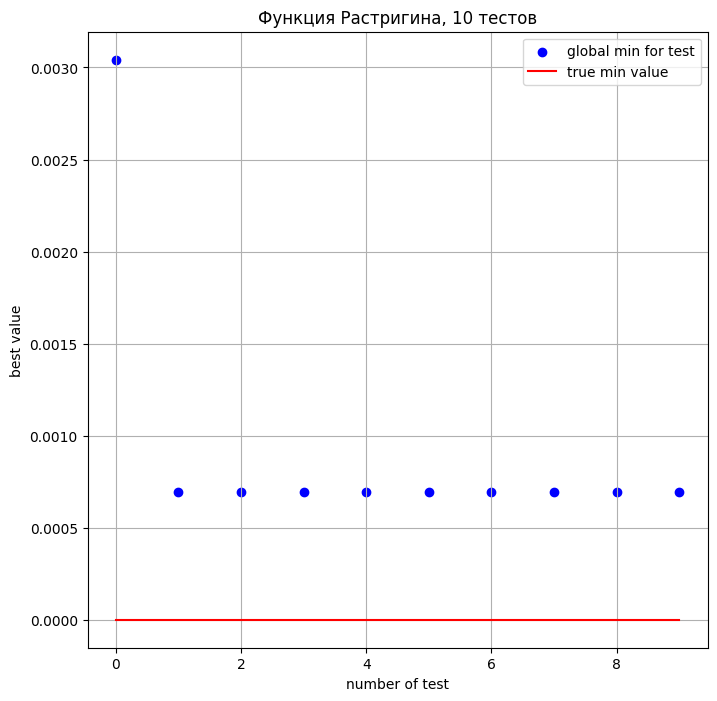

In [5]:
def draw_c(f, title: str):
    dimension = 3
    v_max = 0.05

    for i in range(10):
        y = f(dimension, v_max).best_y

        if i == 0:
            plt.scatter(i, y, c='b', label='global min for test')
            plt.plot(np.arange(10), np.zeros(10), c='r', label='true min value')
            plt.legend()
            plt.xlabel("number of test")
            plt.ylabel("best value")
        else:
            plt.scatter(i, y, c='b')

    plt.title(title)
    plt.show()


draw_c(test_rastrigin, "Функция Растригина, 10 тестов")

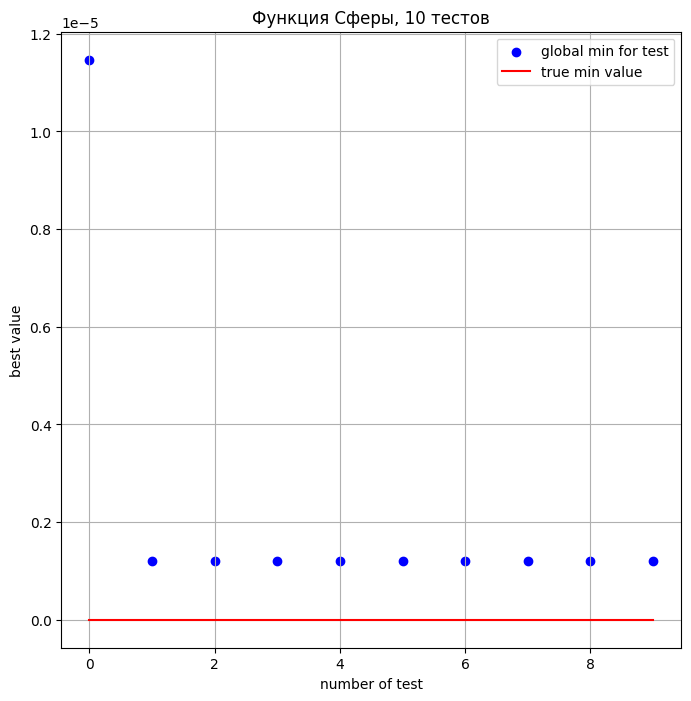

In [6]:
draw_c(test_sphere, "Функция Сферы, 10 тестов")

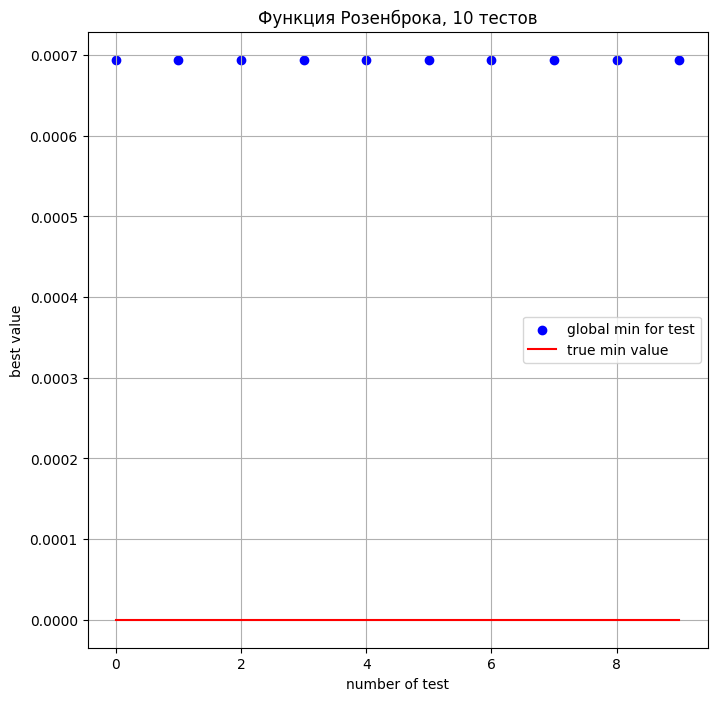

In [6]:
draw_c(test_rozenbroke, "Функция Розенброка, 10 тестов")

<h3>Сравнение реализаций по скорости выполнения</h3>

In [27]:
@njit
def running_on_time(v_max: float, dimension: int, f, kol_agents=50, kol_iter=400):
    px_list: np.ndarray
    py_list: np.ndarray
    best_solution: np.ndarray
    best_coord: np.ndarray

    r1 = np.random.rand(dimension - 1)
    r2 = np.random.rand(dimension - 1)
    weight = 3.4
    p_global_best = 1000.0
    p_best_coordinates = np.zeros(dimension - 1)

    for j in range(kol_agents):
        coordinates = np.random.uniform(-4.12, 4.12, dimension - 1)
        c1 = random()
        c2 = random()
        p_coordinates_now = np.copy(coordinates)
        p_coordinates = np.copy(coordinates)
        p = f(coordinates)
        array_of_speed = np.zeros((kol_iter, dimension - 1))

        if p_global_best > p:
            p_best_coordinates = p_coordinates
            p_global_best = p

        for k in range(dimension - 1):
            array_of_speed[0][k] = uniform(-1 * v_max, v_max)

        for i in range(1, len(array_of_speed)):
            array_of_speed[i] = array_of_speed[i - 1] * weight + \
                                c1 * r1 * (p_best_coordinates - p_coordinates_now) + \
                                c2 * r2 * (p_best_coordinates - p_coordinates_now)

            for k in range(dimension - 1):
                if array_of_speed[i][k] > 0:
                    array_of_speed[i][k] = min(array_of_speed[i][k], v_max)
                else:
                    array_of_speed[i][k] = max(array_of_speed[i][k], v_max)

            p_coordinates_now = p_coordinates_now + array_of_speed[i]

            if p > f(p_coordinates_now):
                p = f(p_coordinates_now)
                p_coordinates = p_coordinates_now

        if p_global_best > p:
            p_best_coordinates = p_coordinates
            p_global_best = p

    return p_best_coordinates, p_global_best

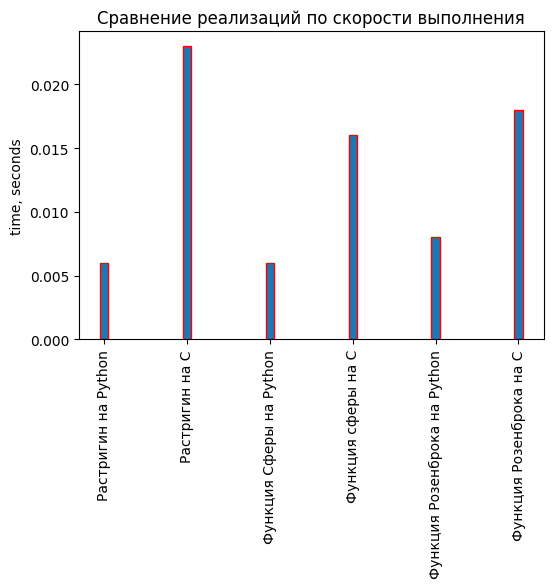

In [29]:
def time_remember(f):
    start = time.time()
    running_on_time(v_max, dimension, f)
    end = time.time() - start
    return end


dimension = 3
v_max = 0.05

time_rastrigin_on_c = test_rozenbroke(dimension, v_max).time_spent
time_sphere_on_c = test_sphere(dimension, v_max).time_spent
time_rozenbroke_on_c = test_rozenbroke(dimension, v_max).time_spent

time_rastrigin_on_python = time_remember(rastrigin)
time_sphere_on_python = time_remember(sphere)
time_rozenbroke_on_python = time_remember(rozenbroke)

plt.rcParams['axes.grid'] = False
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()

list_to_draw = [time_rastrigin_on_python, time_rastrigin_on_c,
                time_sphere_on_python, time_sphere_on_c,
                time_rozenbroke_on_python, time_rozenbroke_on_c]
list_of_title = ['Растригин на Python', 'Растригин на C',
                 'Функция Сферы на Python', 'Функция сферы на C',
                 'Функция Розенброка на Python', 'Функция Розенброка на С']

ax.bar(list_of_title, list_to_draw, width=0.1, edgecolor='r')

plt.ylabel("time, seconds")
plt.title("Сравнение реализаций по скорости выполнения")
plt.xticks(rotation=90)
plt.show()


# Тестирование алгоритма в n-мерном пространстве

In [27]:
# Тестирование реализации на C

# генерация по умолчанию: 50 агентов и 400 поколений (итераций)
dimension = 11 # 10 аргументов
v_max = 0.05 # максимально заданная скорость

print("Theoretical value (sphere): f(0, 0..., 0) = 0\n")
result_sphere = test_sphere(dimension, v_max)
print("best:", result_sphere.best_y)
print("Time is", result_sphere.time_spent)

best_solution = [result_sphere.best_solution[i] for i in range(dimension - 1)]
print("Coordinates:", best_solution)

Theoretical value (sphere): f(0, 0..., 0) = 0

best: 0.20149604976177216
Time is 0.018
Coordinates: [-0.033425044268369675, -0.18125516176223755, -0.08419620990753174, -0.09414263069629669, 0.011103607714176178, 0.1902737021446228, -0.23271457850933075, -0.11080612242221832, 0.21783240139484406, 0.03689364343881607]


In [72]:
def output_python(v_max, dimension, f):
    start = time.time()
    best_x, best_y = running_on_time(v_max, dimension, f, 3000, 10000)
    end = time.time() - start
    print("Time is", end)
    print("Best y:", best_y, "\nBest x:", best_x)

In [73]:
v_max = 0.05    # максимально заданная скорость
dimension = 6  # 5 аргументов
# генерация по умолчанию: 50 агентов и 400 поколений (итераций)
print("Theoretical value (rastrigin): f(0, 0..., 0) = 0\n")
output_python(v_max, dimension, rastrigin)
print("\nTheoretical value (sphere): f(0, 0..., 0) = 0\n")
output_python(v_max, dimension, sphere)

Theoretical value (rastrigin): f(0, 0..., 0) = 0

Time is 5.60555624961853
Best y: 3.802242201052586 
Best x: [-1.0645833   0.00892604 -0.02193508  1.01300652 -0.05914768]

Theoretical value (sphere): f(0, 0..., 0) = 0

Time is 3.71465802192688
Best y: 0.3093406260152096 
Best x: [-0.36434377 -0.18561251  0.32229313  0.19527955 -0.01163055]


In [68]:
print("Theoretical value (rastrigin): f(0, 0..., 0) = 0\n")
output_python(v_max, 3, rastrigin)  # 2 аргумента
print("\nTheoretical value (sphere): f(0, 0..., 0) = 0\n")
output_python(v_max, 3, sphere)

Theoretical value (rastrigin): f(0, 0..., 0) = 0

Time is 1.4960334300994873
Best y: 0.0047889504518430215 
Best x: [-0.00068872 -0.0048648 ]

Theoretical value (sphere): f(0, 0..., 0) = 0

Time is 1.1495506763458252
Best y: 0.000747941729642729 
Best x: [0.01716851 0.02128812]
